# TRABAJO FINAL - APRENDIZAJE AUTOMÁTICO
###  - Nuria Bango Iglesias
###  - Álvar De Diego López

# Abalone UCI
### Prediciendo la edad de los abalones dadas medidas físicas. 

***

## Contexto

El abulón es el nombre común de un grupo de caracoles marinos de pequeño a gran tamaño, que se encuentran habitualmente en las costas de todo el mundo y se utilizan como manjar en las cocinas. Su concha sobrante se utiliza en joyería debido a su brillo iridiscente. 

Debido a su demanda y valor económico, a menudo se recolecta en granjas, por lo que es necesario predecir la edad del abalón a partir de medidas físicas. El método tradicional para determinar su edad consiste en cortar la concha a través del cono, teñirla y contar el número de anillos a través de un microscopio, una tarea aburrida y que requiere mucho tiempo, por lo que predecir la edad utilizando otros factores como el peso o la altura que se pueden medir fácilmente agilizaría el proceso.

Sabemos que a medida que el abalón crece añade anillos, y a medida que añade nuevas capas a la concha aumenta el peso y el diámetro de la misma. Se puede ver en la imagen de abajo:


<img src="abalone_rings.jpg" width="500" />

***

## Datos

Número de instancias: 4177

Número de atributos: 8

Objetivo: Anillos (Rings)

<img src="abalone_partes.jpg" width="500" />

| Atributo | Tipo de datos| Unidades | Descripción |
| :----: | :----: | :----: | :----: |
| Sex | nominal | - | M (masculino), F (femenino), I (infantes) | 
| Length | continuous | mm |  Longitud de la cáscara | 
| Diameter | continuous | mm | Perpendicular a la longitud | 
| Height | continuous | mm | Con carne en la cáscara | 
| Whole weight | continuous | grams | Abalón completo | 
| Shucked weight | continuous | grams | Peso de la carne |
| Viscera weight | continuous | grams | Peso de la tripa (después del sangrado) |
| Shell weight | continuous | grams | Después de ser secado |
| Rings | integer | - | +1.5 da la edad en años | 



## Primeros pasos

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats # Stats API
import seaborn as sns 
sns.set(style='whitegrid', palette='colorblind') 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv('abalone_original.csv')
df.dataframeName = 'abalone_original.csv'
accuracies = {}

In [7]:
df

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...
4172,F,113,90,33,177.4,74.0,47.8,49.8,11
4173,M,118,88,27,193.2,87.8,42.9,52.1,10
4174,M,120,95,41,235.2,105.1,57.5,61.6,9
4175,F,125,97,30,218.9,106.2,52.2,59.2,10


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   int64  
 2   diameter        4177 non-null   int64  
 3   height          4177 non-null   int64  
 4   whole-weight    4177 non-null   float64
 5   shucked-weight  4177 non-null   float64
 6   viscera-weight  4177 non-null   float64
 7   shell-weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


# Análisis de variables individuales

***

## Sexo

A partir de los campos de descripción de los datos iniciales sabemos que el sexo se clasifica en Macho, Hembra, lo cual tiene sentido, mientras que Infante parece estar mal clasificado o fue clasificado así ya que era difícil decir el sexo en el momento de la observación ya que el Abalón era Infante.

Vamos a confirmar primero que son 3 las categorias y cual de ellas es más frecuente.

In [27]:
df.sex.describe()

count     4177
unique       3
top          M
freq      1528
Name: sex, dtype: object

Podemos confirmar que la categoría sexo sólo tiene 3 campos, principalmente: masculino, femenino e infantil, siendo el masculino el más frecuente. 

Veamos su densidad, para entender en qué medida es mayor el sexo masculino que el femenino y el infantil en este conjunto de datos.

In [29]:
df.sex.value_counts(normalize=True).sort_index()

F    0.312904
I    0.321283
M    0.365813
Name: sex, dtype: float64

Por lo tanto, hay un número significativamente mayor de hombres que de otras dos categorías, visualicemos ya que las mujeres y los niños están muy cerca utilizando la densidad relativa para tener una idea de sus diferencias.

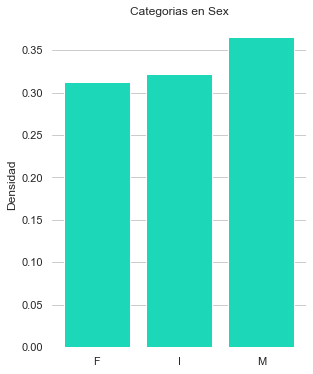

In [31]:
df_sex_category = df.sex.value_counts(normalize=True).sort_index()
x = range(len(df_sex_category))
figure = plt.figure(figsize=(10, 6))
axes1 = figure.add_subplot(1, 2, 1)
axes1.bar(x, df_sex_category, color="#1DD7B9",align="center")
axes1.set_xticks(x)
axes1.set_xticklabels(df_sex_category.axes[0])
axes1.set_title("Categorias en Sex")
axes1.set_ylabel("Densidad")
axes1.xaxis.grid(False)
axes1.tick_params(bottom=False, top=False, left=False, right=False)
for spine in axes1.spines.values():
    spine.set_visible(False)
axes1.yaxis.grid(b=True, which="major")

Hay aproximadamente la misma proporción de mujeres y niños, con un poco más de hombres que de mujeres o niños.

Una cosa que podemos notar, es que presumiblemente el sexo es mucho más difícil de reconocer en los infantes y esto es evidente basado en que tenemos ligeramente más infantes que hembras.

## Longitud

Hagamos una estadística de resumen para ver cómo se distribuye la longitud, esperamos que siga una distribución normal, con algo de asimetría teniendo en cuenta que tenemos niños en el conjunto de datos.

In [33]:
df.length.describe()

count    4177.000000
mean      104.798420
std        24.018583
min        15.000000
25%        90.000000
50%       109.000000
75%       123.000000
max       163.000000
Name: length, dtype: float64

Lo primero que destaca es que el mínimo es realmente pequeño, 15 mm, lo que tiene sentido debido a los bebés en el conjunto de datos, que puede ser la razón por la que la distribución tendría una distribución sesgada a la izquierda.

Vamos a visualizarlo con un gráfico de caja para verificarlo, y ver si hay alguna anomalía como valores atípicos en la longitud.


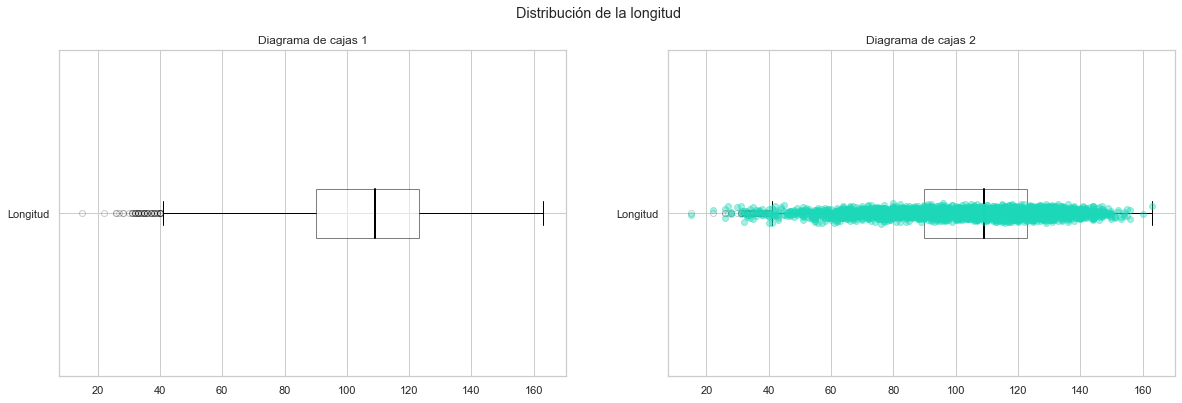

In [35]:
def restyle_boxplot(patch):
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

    for box in patch["boxes"]:
        box.set(facecolor='#FFFFFF', alpha=0.5)

def numeric_boxplot(numeric_df, label, title):
    figure = plt.figure(figsize=(20, 6))
    figure.suptitle(title)
    axes1 = figure.add_subplot(1, 2, 1)
    patch = axes1.boxplot(numeric_df, labels=[label], vert=False, showfliers = True, patch_artist=True, zorder=1)
    restyle_boxplot(patch)
    axes1.set_title('Diagrama de cajas 1')
    axes2 = figure.add_subplot(1, 2, 2)
    patch = axes2.boxplot(numeric_df, labels=[label], vert=False, patch_artist=True, zorder=1)
    restyle_boxplot(patch)
    axes2.set_title('Diagrama de cajas 2')
    y = np.random.normal(1, 0.01, size=len(numeric_df))
    axes2.plot(numeric_df, y, 'o', color='#1DD7B9', alpha=0.4, zorder=2)
    plt.show()
    plt.close()

numeric_boxplot(df.length, 'Longitud', 'Distribución de la longitud')

El diagrama 1 nos dice que existen valores atípicos entre los rangos de 20 a 40, lo que presumiblemente se debe a la presencia de infantes o de especies particulares de abulón de pequeño tamaño.

En el diagrama 2 podemos ver que la distribución está efectivamente sesgada a la izquierda y que los valores se centran en el rango 100-140.

## Peso

De las cuatro medidas de peso diferentes: El peso de la cáscara, el peso de las vísceras, el peso del descascarillado y alguna masa desconocida de agua/sangre perdida por el proceso de descascarillado, intentaremos sacar conclusiones como peso total.

Peso total = peso de la cáscara+peso de la víscera+peso del descascarillado+masa desconocida de agua/sangre perdida

Analizaremos todos los pesos juntos ya que están relacionados entre sí y deberían tener estadísticas similares.

Exploremos primero las estadísticas para todas las características del peso:


In [37]:
df[['whole-weight', 'shucked-weight', 'viscera-weight', 'shell-weight']].describe()

,whole-weight,shucked-weight,viscera-weight,shell-weight
count,4177.000000,4177.000000,4177.000000,4177.000000
mean,165.748432,71.873498,36.118722,47.766172
std,98.077804,44.392590,21.922850,27.840534
min,0.400000,0.200000,0.100000,0.300000
25%,88.300000,37.200000,18.700000,26.000000
50%,159.900000,67.200000,34.200000,46.800000
75%,230.600000,100.400000,50.600000,65.800000
max,565.100000,297.600000,152.000000,201.000000


De las estadísticas resumidas anteriores podemos ver que cada característica de peso tiene una media mayor que la mediana, por lo que podemos esperar una asimetría derecha en la distribución, a diferencia de la longitud y el diámetro.

Para todo el peso, podemos ver que los rangos de peso van desde el más bajo de alrededor de 0 gramos hasta el máximo que pesa alrededor de 570 gramos.

Es de esperar una tendencia similar, y parece que los pesos tienen una alta varianza, y esto vuelve a lo que dijimos antes, en cuanto a que el abalón es una colección de tamaños pequeños y grandes, por lo que deberíamos esperar que los pesos varíen entre los abalones.

Ahora vamos a visualizar la dispersión con un histograma de densidad para ver si parece normal y tiene la asimetría correcta.


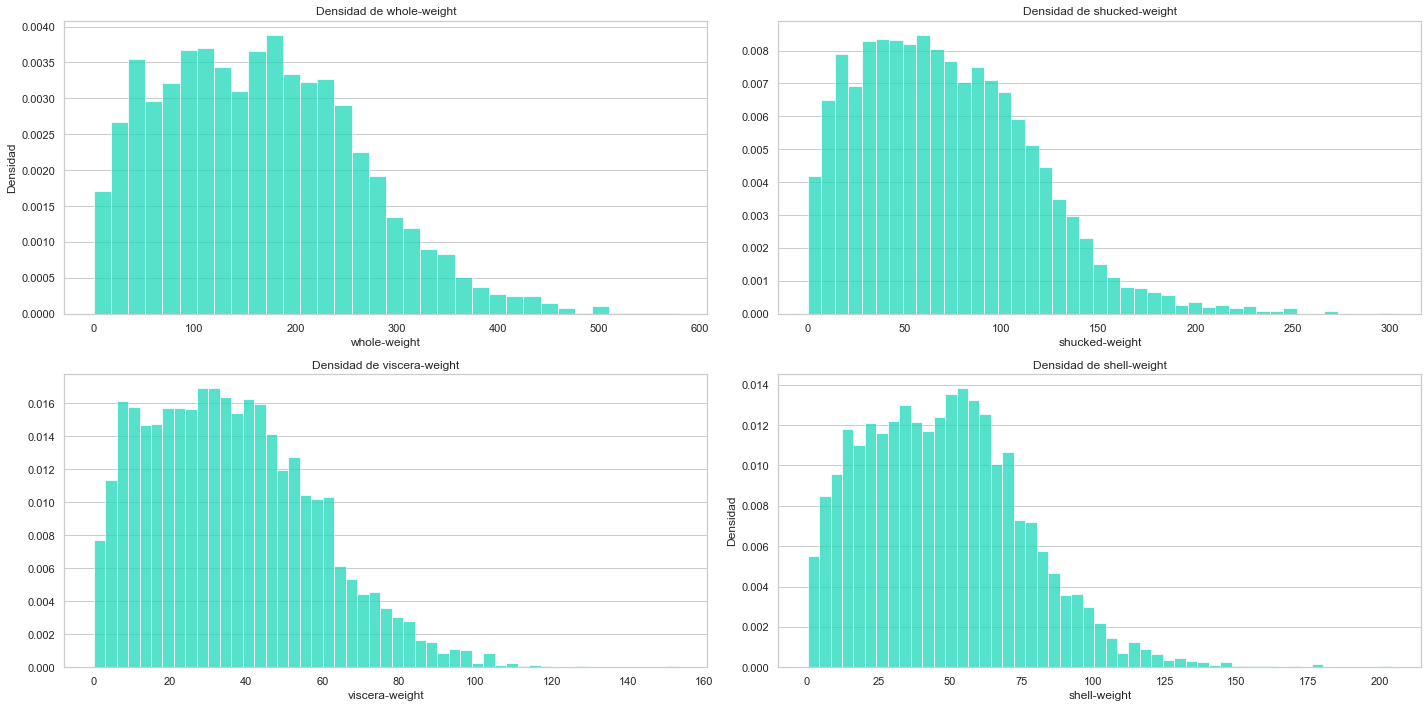

In [39]:
def freeman_diaconis(data):
    quartiles = stats.mstats.mquantiles(data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[0]
    n = len(data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int(h)

weights = ['whole-weight', 'shucked-weight', 'viscera-weight', 'shell-weight']
figure = plt.figure(figsize=(20, 10))
for i, k in enumerate(weights):
    axes = figure.add_subplot(2, 2, i + 1)
    subdata = df[k]
    binwidth = freeman_diaconis(subdata)
    bins = np.arange(min(subdata), max(subdata) + binwidth, binwidth)
    axes.hist(subdata, color="#1DD7B9", bins=bins, density=True, alpha=0.75)
    axes.xaxis.grid(False)
    axes.set_title("Densidad de {}".format(k))
    if (i % 3 == 0):
        axes.set_ylabel("Densidad")
    axes.set_xlabel(k)
plt.tight_layout()


De hecho, la distribución está sesgada a la derecha y el peso de la cáscara y el peso de las vísceras son similares al peso entero y entre sí.

Ahora podemos esperar que el peso entero esté altamente correlacionado con otras variables de peso, lo que no nos ayuda mucho a predecir la edad.

## Anillos

Sabemos que los anillos son un predictor de la edad, por lo que son valores enteros, ya que se cuentan como una cantidad discreta en lugar de valores continuos, por lo que deberíamos ver distribuciones discretas con los anillos, y los recuentos serían más apropiados para el eje Y.

Ahora vamos a empezar con las estadísticas de resumen para ver cuál es el número mínimo y máximo de anillos, y dónde se encuentra la media de la muestra.


In [41]:
df.rings.describe()


count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: rings, dtype: float64

Podemos ver que la mayoría de los anillos están entre 8 y 10, mientras que la media está en torno a 10, y como la media es mayor que la mediana, la distribución sería sesgada a la derecha. La varianza de la muestra es menor, por lo que la distribución sería más estrecha, podemos trazar un histograma de densidad para comprobarlo.


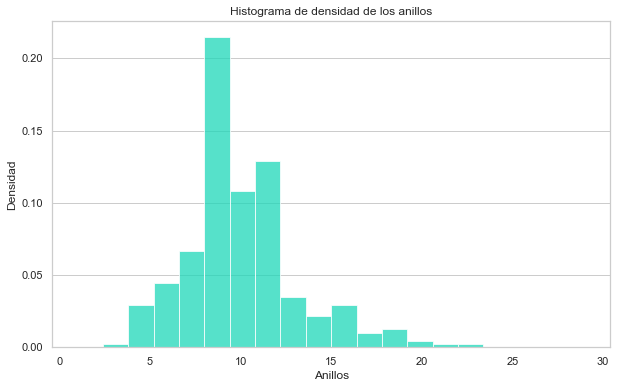

In [43]:
bins = np.arange(min(df.rings), max(df.rings) + binwidth, binwidth)
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(df.rings, color="#1DD7B9", bins=20, density=True, alpha=0.75)
axes.set_ylabel("Densidad")
axes.set_xlabel("Anillos")
axes.set_title("Histograma de densidad de los anillos")
axes.xaxis.grid(False)
plt.show()

Efectivamente, es como esperábamos, la distribución es sesgada a la derecha y tiene menos dispersión, con una media en torno a 10, por lo que la edad del abalón estaría en torno a los 11,5 años.

# Análasis a pares

Antes de realizar el análisis por pares, visualicemos la matriz de coeficientes de correlación en forma de mapa de calor para entender qué análisis por pares debemos comprobar.

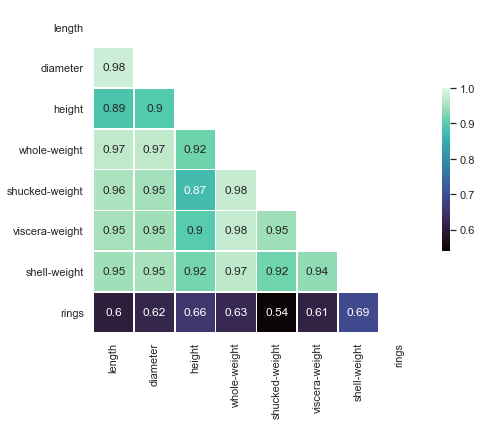

In [45]:
corr = df.corr('spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap="mako", mask=mask, vmax=1, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
plt.show()
plt.close()

Como conclusiones a los análisis individuales de todos los atributos y junto con la información que proporciona la tabla de análisis a pares se genera la premisa sobre la que se trabajará a continuación.

Dado que los abalones infantes, que tienen un numero menor a la media de anillos, no son clasificables, deberían de ser descartados para cualquier uso humano, es necesario dejar que crezcan. Es por esto por lo que a partir de ahora se intentarán separar dos grandes grupos: útiles y desechables, es decir, con un número bajo de anillos o un número adecuado, siendo este número frontera: 10. 

Para la predicción del número de anillos se utilizarán todos los atributos reflejados en la tabla de pares, es decir, todos menos el sexo, ya que con muy poca variación entre si, tienen gran relación directa con el número de anillos.


# Prediciendo Anillos

Se usarán tres métodos distintos para la predicción del número de anillos y su respectiva separación en infantes y útiles, como se comentaba anteriormente.

        - Regresión logística
        - Redes neuronales
        - SVM

## Regresión Logística



La regresión logística es un tipo de método de aprendizaje automático basado en la regresión que modela las probabilidades en problemas de clasificación con dos resultados posibles. Es una extensión del modelo de regresión lineal para problemas de clasificación.

Hemos escogido este método porque es de los más útiles para predecir el resultado entre de una posible variable categórica.

En nuestro caso vamos a utilizar todas las variables menos el sexo para predecir si los abalones tienen más o menos de 10 anillos.

In [8]:
import scipy.optimize as opt

# Funcion Sigmoide
def sigmoid(Z):
	return 1/(1+np.exp(-Z))

# Funcion de Coste
def cost(O, X, Y):
	return -((np.log(sigmoid(X.dot(O)))).T.dot(Y) + (np.log(1-sigmoid(X.dot(O)))).T.dot(1-Y))/X.shape[0]

# Operacion que hace el gradiente, devuelve un vector de valores
def gradient(O, X, Y):  
	return (X.T.dot(sigmoid(X.dot(O))-Y))/X.shape[0]

# Determina el porcentaje de aciertos comparando los resultados estimados con los resultados reales
def success_percentage(theta, X, Y):
	Z = sigmoid(X@theta)
	pos = np.where(Y == 1)
	neg = np.where(Y == 0)
	z_pos = np.where(Z >= 0.5)
	z_neg = np.where(Z < 0.5)

	pos_perc = np.shape(z_pos)[1] * 100 / np.shape(pos)[1]	
	if pos_perc > 100: pos_perc = 200 - pos_perc	
	accuracies['Regresión logística'] = pos_perc
	print("Probabilidad de acierto: " + format(pos_perc))

def logistic_regression(X, y):	

	m = np.shape(X)[0]
	X_ones = np.hstack([np.ones([m, 1]), X])
	n = np.shape(X_ones)[1]

	Theta = np.zeros(n)

	result = opt.fmin_tnc(func=cost, x0=Theta, fprime=gradient, args=(X_ones, y))
	theta_opt = result[0]
	
	success_percentage(theta_opt, X_ones, y)
	print("\n")

df = pd.read_csv("abalone_original.csv")
    
df['newRings'] = np.where(df['rings'] > 10,1,0)

y = df['newRings']
X = df.drop(['newRings','rings','sex'], axis = 1)

logistic_regression(X ,y)

Probabilidad de acierto: 79.61299239806496




Mediante regresión logística hemos obtenido una probabilidad de acierto del 79.6%, la cuál es bastante alta. Veremos a continuación si los demás métodos de aprendizaje automático son igual, más o menos eficaces.

## Redes Neuronales

Una red neuronal es un modelo de computación cuya estructura de capas se asemeja a la estructura interconectada de las neuronas en el cerebro, con capas de nodos conectados. Una red neuronal puede aprender de los datos, de manera que se puede entrenar para que reconozca patrones, clasifique datos y pronostique eventos futuros.

Las redes neuronales descomponen las entradas en capas de abstracción. Se pueden entrenar con muchos ejemplos para que reconozcan patrones de voz o en imágenes, por ejemplo, igual que el cerebro humano. Su comportamiento está definido por la forma en que se conectan sus elementos individuales, así como por la importancia (o ponderación) de dichas conexiones. Estas ponderaciones se ajustan automáticamente durante el entrenamiento de acuerdo con una regla de aprendizaje especificada hasta que la red neuronal lleva a cabo la tarea deseada correctamente.

### Implementación

Para la implementación de la red neuronal, hemos utilizado la implementación realizada en clase y la hemos modificado para adaptarla a las necesidades de nuestro estudio.

Nuestra red neuronal es una red de 3 capas en la que la capa inicial tiene 7 nodos de entrada correspondiente a las siete columnas de variables que utilizamos para predecir el número de anillos de los abalones. La capa intermedia, o capa oculta tiene un total de 4 nodos. Hemos probado a configurarla con distintos números de nodos en la capa oculta y los resultados prácticamente no variaban, por eso las pruebas que hemos hecho las hemos basado en cambiar los valores de Lambda.

En cuánto a la capa de salida, teóricamente la red debería tener un solo nodo que represente mediante 0 y 1 si los abalones tienen menos o más de 10 anillos. Pero tras algunas complicaciones hemos decidido hacer una red con dos nodos de salida, siguiendo el fromato que utilizan las redes en las que la variable a predecir tiene 3 o más resultados posibles. En este caso "10" representa a los abalones con menos de 10 anillos, mientras que "01" a los que tiene más de 10 anillos.

Vamos a realizar 3 pruebas diferentes en las que cambiaremos los valores de Lambda para ver cómo varía la predicción.


In [9]:
def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

def normaliza_datos(X):
    
    media = np.mean(X, axis=0)
    desviacion = np.std(X, axis = 0)
    Xnorm = (X-media) / desviacion

    return Xnorm

def sigmoidGradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

def check_accuracy(y, out):
    max_i = np.argmax(out, axis = 1) +1
    #max_i = np.where(out >= 0.5)
    control = (y[:, 0] == max_i) 

    # Porcentaje sobre el total de ejemplos redondeado
    return 100 * np.size(np.where(control == True)) / y.shape[0]

def pesosAleatorios(L_in, L_out):
    epsilon = 0.12
    
    # Inicializamos la matriz con 0s
    pesos = np.zeros((L_out, 1 + L_in))
    
    # Valores aleatorios en ese intervalo
    pesos = np.random.rand(L_out, 1 + L_in) * (2 * epsilon) - epsilon
    return pesos

def forward_prop(X, theta1, theta2):
    m = X.shape[0]

    a1 = np.hstack([np.ones([m, 1]), X])
    z2 = np.dot(a1, theta1.T)
    a2 = np.hstack([np.ones([m, 1]), sigmoid(z2)])
    z3 = np.dot(a2, theta2.T)
    h = sigmoid(z3)
    return a1, z2, a2, z3, h

def back_propagation(params_rn, num_entradas, num_ocultas, num_etiquetas, X, Y, Lambda):
    # Unroll thetas (neural network params)
    theta1 = np.reshape(params_rn[:num_ocultas * (num_entradas + 1)], (num_ocultas, (num_entradas + 1)))
    theta2 = np.reshape(params_rn[num_ocultas * (num_entradas + 1):], (num_etiquetas, (num_ocultas + 1)))

    A1, Z2, A2, Z3, A3 = forward_prop(X, theta1, theta2)

    # Cost function (without reg term)
    m = X.shape[0]
    cost_unreg_term = (-Y * np.log(A3) - (1 - Y) * np.log(1 - A3)).sum() / m

    # Cost function (with reg term)
    cost_reg_term = (Lambda / (2 * m)) * (np.sum(theta1[:, 1:] ** 2) + np.sum(theta2[:, 1:] ** 2))
    cost = cost_unreg_term + cost_reg_term

    # Numerical gradient (without reg term)
    Theta1_grad = np.zeros(np.shape(theta1))
    Theta2_grad = np.zeros(np.shape(theta2))
    D3 = A3 - Y
    D2 = np.dot(D3, theta2)
    D2 = D2 * (np.hstack([np.ones([Z2.shape[0], 1]), sigmoidGradient(Z2)]))
    D2 = D2[:, 1:]
    Theta1_grad = Theta1_grad + np.dot(A1.T, D2).T
    Theta2_grad = Theta2_grad + np.dot(A2.T, D3).T

    # Numerical gradient (with reg term)
    Theta1_grad = Theta1_grad * (1 / m)
    Theta2_grad = Theta2_grad * (1 / m)
    Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + (Lambda / m) * theta1[:, 1:]
    Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + (Lambda / m) * theta2[:, 1:]
    grad = np.concatenate((np.ravel(Theta1_grad), np.ravel(Theta2_grad)))

    return (cost, grad)

def optimize(backprop, params_rn, input_layer_size, hidden_layer_size, num_labels, X, Y, Lambda, num_iter):
    result = opt.minimize(fun=backprop, x0=params_rn,
    args=(input_layer_size, hidden_layer_size, num_labels, X, Y, Lambda),
    method='TNC', jac=True, options={'maxiter': num_iter})
    return result.x

def neural_network_training(theta1, theta2, input_layer_size, hidden_layer_size, num_labels, X, Y, Lambda, num_iter):
    
    # Init Neural Network params
    theta1 = pesosAleatorios(theta1.shape[1] - 1, theta1.shape[0])
    theta2 = pesosAleatorios(theta2.shape[1] - 1, theta2.shape[0])

    # Train Neural Network
    params_rn = np.concatenate([theta1.reshape(-1), theta2.reshape(-1)])
    theta_opt = optimize(back_propagation, params_rn, input_layer_size, hidden_layer_size, num_labels, X, Y, Lambda, num_iter)
    theta1_opt = np.reshape(theta_opt[:hidden_layer_size * (input_layer_size + 1)], (hidden_layer_size, (input_layer_size + 1)))
    theta2_opt = np.reshape(theta_opt[hidden_layer_size * (input_layer_size + 1):], (num_labels, (hidden_layer_size + 1 )))

    return check_accuracy(Y, forward_prop(X, theta1_opt, theta2_opt)[4])

############################################################

df = pd.read_csv("abalone_original.csv")

df['newRings'] = np.where(df['rings'] > 10,0,1)

y = df['newRings']
X = df.drop(['newRings','rings','sex'], axis = 1)
m = len(y)

Xnorm = normaliza_datos(X) 

#X.info()

num_entradas = 7
num_ocultas = 4
num_etiquetas = 2

print(X.shape)
print(y.shape)

#Y = np.hstack([np.ones([m,1]),y)
y = (y-1)
y_one = np.zeros((m , num_etiquetas))

for i in range(m):
    y_one[i][y[i]] = 1

print(y_one.shape)


def prueba():
    print("\nPrueba ----------------------------------\n")
    num_iter = 600

    theta1 = np.zeros((num_ocultas, num_entradas + 1))
    theta2 = np.zeros((num_etiquetas, num_ocultas + 1))

    Lambda = 0.001

    percentage = neural_network_training(theta1, theta2, num_entradas, num_ocultas, num_etiquetas, Xnorm, y_one, Lambda, num_iter)
    print("\nNeural Network (Lambda: {} | Iteraciones: {}) Porcentaje de acierto: {}%".format(Lambda, num_iter, percentage))

def prueba2():
    print("\nPrueba 2 ----------------------------------\n")
    num_iter = 600

    theta1 = np.zeros((num_ocultas, num_entradas + 1))
    theta2 = np.zeros((num_etiquetas, num_ocultas + 1))

    lambdas = np.array([5, 10, 25, 50, 100, 200, 500, 1000])
    percentages = np.zeros(len(lambdas))

    for i in range(len(lambdas)):
        percentages[i] = neural_network_training(theta1, theta2, num_entradas, num_ocultas, num_etiquetas, Xnorm, y_one, lambdas[i], num_iter)
        accuracies['Redes neuronales'] = percentages[i]

    plt.plot(lambdas, percentages, color="#1DD7B9")
    plt.xlabel("Lambda")
    plt.ylabel("% de acierto")
    plt.show()

    print("Lambdas: ")
    for i in range(len(lambdas)):
        print(lambdas[i])
    print("Porcentajes de acierto: {}".format(percentages))

def prueba3():
    print("\nParte 3 ----------------------------------\n")
    num_iter = 600

    theta1 = np.zeros((num_ocultas, num_entradas + 1))
    theta2 = np.zeros((num_etiquetas, num_ocultas + 1))

    lambdas = np.array([0.01,0.05, 0.1, 0.5, 1])
    percentages = np.zeros(len(lambdas))

    for i in range(len(lambdas)):
        percentages[i] = neural_network_training(theta1, theta2, num_entradas, num_ocultas, num_etiquetas, Xnorm, y_one, lambdas[i], num_iter)

    plt.plot(lambdas, percentages, color="#1DD7B9")
    plt.xlabel("Lambda")
    plt.ylabel("% de acierto")
    plt.show()

    print("Lambdas: ")  
    for i in range(len(lambdas)):
        print(lambdas[i])
    print("Porcentajes de acierto: {}".format(percentages))

(4177, 7)
(4177,)
(4177, 2)


In [10]:
prueba()


Prueba ----------------------------------


Neural Network (Lambda: 0.001 | Iteraciones: 600) Porcentaje de acierto: 57.170217859707925%


En esta primera prueba simplemento comprobamos que la red neuronal funciona. Utilizamos Lambda = 0.001 y 600 iteraciones. Nos da un % de acierto de 57.2%, el cual es más bajo que utilizando regresión logística.


Prueba 2 ----------------------------------



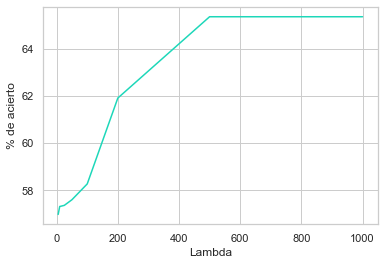

Lambdas: 
5
10
25
50
100
200
500
1000
Porcentajes de acierto: [56.97869284 57.31386162 57.36174288 57.60114915 58.27148671 61.91046205
 65.35791238 65.35791238]


In [11]:
prueba2()

En esta segunda prueba testeamos la red neuronal con Lambdas de gran tamaño en un rango desde 5 hasta 1000. Se puede observar que cuánto más grande sea Lambda mayor porcentaje de predicción obtenemos, estancándose en torno a 500 con un porcentaje de acierto de aproximadamente 65.35%


Parte 3 ----------------------------------



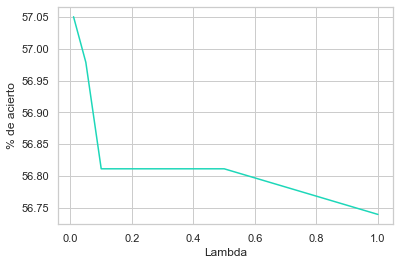

Lambdas: 
0.01
0.05
0.1
0.5
1.0
Porcentajes de acierto: [57.05051472 56.97869284 56.81110845 56.81110845 56.73928657]


In [12]:
prueba3()

En esta tercera prueba hacemos lo mismo que en la segunda prueba pero con Lambdas de menor tamaño, con rango desde 0.01 a 0.5. Podemos observar que el porcentaje de acierto es ligeramente mayor para lambda = 0.01 pero que según se aproxima a 1 decrece el porcentaje. Aún así, fijándonos en el rango de porcentajes, realmente a penas varía.

## SVM

Las máquinas de vectores de soporte se forman por algoritmos de aprendizaje supervisadoque están relacionados con los problemas de clasificación y regresión. La SVM laentrenamos con un conjunto de muestras para predecir el resultado de una nueva muestra.

Vamos a utilizarlas para predecir el número de anillos de los abalones, de la misma forma que hemos utilizado los anteriores métodos de prendizaje automático.

Para implementarla hemos utilizado la librería Sklearn y hemos utilizado kernel lineal.

La prueba realizada se ha basado en incrementar el parámetro de regularización C de 10 en 10 desde 1 hasta 300 para ver cómo varían los porcentajes de acierto.

Porcentaje de acierto (C = 1): 77.87%
Porcentaje de acierto (C = 11): 78.83%
Porcentaje de acierto (C = 21): 78.71%
Porcentaje de acierto (C = 31): 78.59%
Porcentaje de acierto (C = 41): 78.71%
Porcentaje de acierto (C = 51): 79.07%
Porcentaje de acierto (C = 61): 79.07%
Porcentaje de acierto (C = 71): 79.07%
Porcentaje de acierto (C = 81): 79.07%
Porcentaje de acierto (C = 91): 79.19%
Porcentaje de acierto (C = 101): 79.19%
Porcentaje de acierto (C = 111): 79.19%
Porcentaje de acierto (C = 121): 79.19%
Porcentaje de acierto (C = 131): 79.19%
Porcentaje de acierto (C = 141): 79.19%
Porcentaje de acierto (C = 151): 79.19%
Porcentaje de acierto (C = 161): 79.19%
Porcentaje de acierto (C = 171): 79.19%
Porcentaje de acierto (C = 181): 79.19%
Porcentaje de acierto (C = 191): 79.19%
Porcentaje de acierto (C = 201): 79.19%
Porcentaje de acierto (C = 211): 79.19%
Porcentaje de acierto (C = 221): 79.19%
Porcentaje de acierto (C = 231): 79.19%
Porcentaje de acierto (C = 241): 79.19%
Porcentaje 

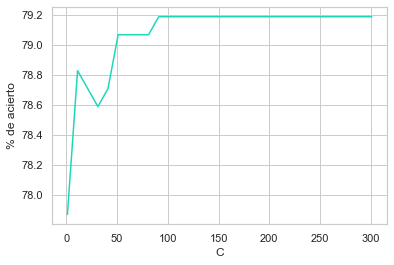

In [87]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None

df = pd.read_csv("abalone_original.csv")

df['newRings'] = np.where(df['rings'] < 10,1,0)

y = df['newRings']
x_data = df.drop(['newRings','rings','sex'], axis = 1)
#x_data.info()

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

def SVMLinear(x_train, y_train, x_test, y_test, C):
    svm = SVC(C=C, kernel='linear', tol=1e-3, max_iter=-1)
    svm.fit(x_train, y_train)
    accuracy = svm.score(x_test, y_test)

    print("Porcentaje de acierto (C = {}): {:.2f}%".format(C, accuracy * 100))
    return accuracy


def prueba():
    cs = np.arange(1, 302, 10)
    percentages = np.zeros(len(cs))

    for i in range(len(cs)):
        percentages[i] = SVMLinear(x_train, y_train, x_test, y_test, cs[i]) * 100 
        accuracies['SVM'] = percentages[i]

    plt.plot(cs, percentages, c="#1DD7B9")
    plt.xlabel("C")
    plt.ylabel("% de acierto")
    plt.show()

# Realizamos experimentos individuales con C = 11, 21, 31 ..... 201
prueba()


En el experimento podemos apreciar que cúanto mayor sea el valor de C mayor precisión obtendremos con la SVN. Yendo desde 77.8% con C = 1 y quedándose estancado en 79.19% a partir de C = 91, como se puede apreciar en la gráfica.

# Conclusiones

Con todas las predicciones vistas en el apartado anterior podemos sacar ciertas conclusiones. Principalmente nos centramos en la comparación de eficacia entre técnicas, asumiendo además que valores son los más altos en cada técnica descartando variables que empeoren el resultado obtenido.

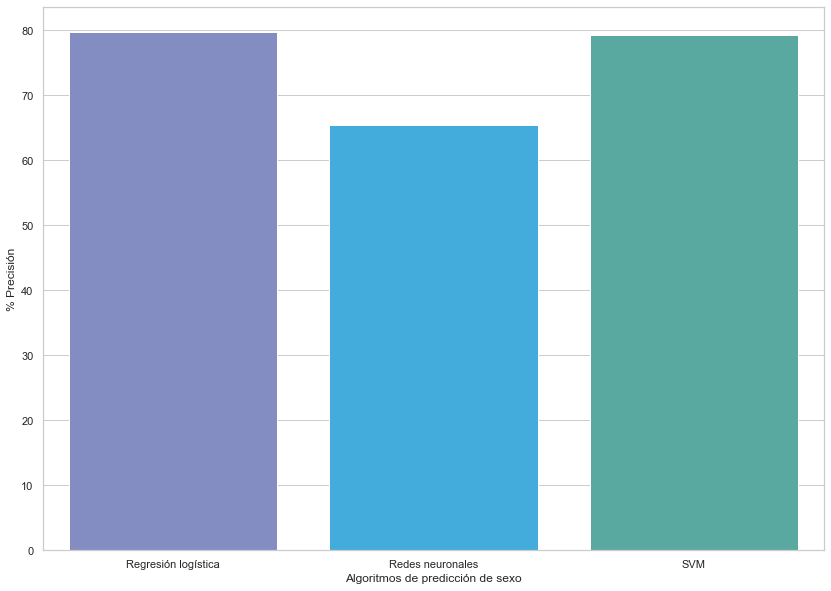

In [92]:
colors = ["#7986CB", "#29B6F6", "#4DB6AC"]

sns.set_style("whitegrid")
plt.figure(figsize=(14,10))
plt.ylabel("% Precisión")
plt.xlabel("Algoritmos de predicción de sexo")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

Todas los resultados superan el 65% de acierto, siendo con redes neuronales el peor de los casos, con un 65.36% de acierto. Debido al uso de redes neuronales con dos nodos de salida, es posible que este resultado se vea afectado de manera que fuese mayor si solo se hubiese utilizado un nodo de salida con dos valores codificados.
Por otra parte, tanto regresión lineal como SVM alcanzan casi un 80% de acierto (79.61% y 79.19% respectivamente).

En redes neuronales, el valor de lamda consigue la mayor eficacia del algoritmo en números superiores a 500.
En SVMs, el valor del parámetro de regularización C consigue su mayor porcentaje de acierto cuando supera el valor 100.





# Bibliografía

***

El link principal de referencia de Kaggle es: https://www.kaggle.com/hurshd0/abalone-uci

El Dataset fue sacado originalmente del repositorio de UCI Machine Learning: https://archive.ics.uci.edu/ml/datasets/Abalone
